In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('DataDownload2015.xlsx', sheet_name='Food Access Research Atlas')
df.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [4]:
df.set_index('CensusTract', inplace=True)
target_df = df[['LILATracts_halfAnd10']]
target_df.head()

,LILATracts_halfAnd10
CensusTract,
1001020100,0
1001020200,0
1001020300,0
1001020400,0
1001020500,0


##### target label info:
LILATracts_halfAnd10 = Low-income census tracts where a significant number (at least 500 people) or share (at least 33 percent) of the population is greater than ½ mile from the nearest supermarket, supercenter, or large grocery store for an urban area or greater than 10 miles for a rural area. Using this measure, an estimated 54.4 million people, or 17.7 percent of the U.S. population, live in tracts that are low-income and low access and are more than ½ mile or 10 miles from the nearest supermarket.

In [5]:
health_stats = pd.read_csv('500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2018_release.csv')
health_stats.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",...,"(83.4, 86.6)",20.0,"(18.5, 21.7)",45.5,"(44.3, 46.5)",5.6,"( 5.1, 6.1)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",...,"(81.9, 85.6)",20.6,"(18.8, 22.5)",44.5,"(43.2, 45.7)",5.9,"( 5.3, 6.5)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",...,"(82.3, 86.8)",19.3,"(17.6, 21.4)",45.7,"(44.2, 47.0)",5.7,"( 5.1, 6.4)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",...,"(82.1, 86.5)",21.8,"(19.8, 24.0)",46.1,"(44.5, 47.4)",7.7,"( 6.9, 8.6)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",...,"(82.2, 87.1)",25.1,"(22.9, 27.6)",48.3,"(46.6, 49.7)",9.5,"( 8.4, 10.6)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"


In [6]:
health_stats.set_index('TractFIPS', inplace=True)
health_stats.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
TractFIPS,,,,,,,,,,,,,,,,,,,,,
1073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",11.5,...,"(83.4, 86.6)",20.0,"(18.5, 21.7)",45.5,"(44.3, 46.5)",5.6,"( 5.1, 6.1)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",12.0,...,"(81.9, 85.6)",20.6,"(18.8, 22.5)",44.5,"(43.2, 45.7)",5.9,"( 5.3, 6.5)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
1073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",11.6,...,"(82.3, 86.8)",19.3,"(17.6, 21.4)",45.7,"(44.2, 47.0)",5.7,"( 5.1, 6.4)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",10.0,...,"(82.1, 86.5)",21.8,"(19.8, 24.0)",46.1,"(44.5, 47.4)",7.7,"( 6.9, 8.6)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",8.4,...,"(82.2, 87.1)",25.1,"(22.9, 27.6)",48.3,"(46.6, 49.7)",9.5,"( 8.4, 10.6)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"


In [9]:
combined_data = health_stats.join(target_df)
combined_data.head()
%store combined_data


Stored 'combined_data' (DataFrame)


In [10]:
combined_data.shape

(27210, 63)

In [8]:
combined_data.rename(columns={'LILATracts_halfAnd10': 'target'}, inplace=True)
combined_data.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,target
1073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",11.5,...,20.0,"(18.5, 21.7)",45.5,"(44.3, 46.5)",5.6,"( 5.1, 6.1)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)",1.0
1073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",12.0,...,20.6,"(18.8, 22.5)",44.5,"(43.2, 45.7)",5.9,"( 5.3, 6.5)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)",1.0
1073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",11.6,...,19.3,"(17.6, 21.4)",45.7,"(44.2, 47.0)",5.7,"( 5.1, 6.4)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)",1.0
1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",10.0,...,21.8,"(19.8, 24.0)",46.1,"(44.5, 47.4)",7.7,"( 6.9, 8.6)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)",1.0
1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",8.4,...,25.1,"(22.9, 27.6)",48.3,"(46.6, 49.7)",9.5,"( 8.4, 10.6)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)",1.0


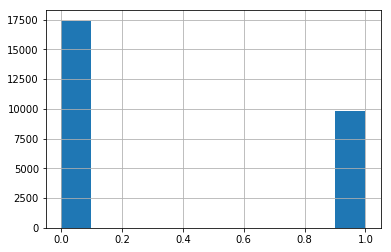

In [9]:
combined_data.target.hist(figsize=(6,4))

In [10]:
to_drop = [x for x in combined_data.columns if x[-2:] == "CI"]

In [11]:
combined_data.drop(columns=to_drop, inplace=True)
combined_data.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,...,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,target
1073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,31.3,11.5,46.2,80.0,...,82.8,18.6,47.3,85.0,20.0,45.5,5.6,28.9,"(33.57943283260, -86.7228323926)",1.0
1073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,30.2,12.0,45.6,80.3,...,83.2,18.4,47.5,83.8,20.6,44.5,5.9,32.9,"(33.54282086860, -86.7524339780)",1.0
1073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,31.7,11.6,50.1,82.0,...,83.5,17.5,47.2,84.6,19.3,45.7,5.7,28.6,"(33.56324496330, -86.7640474064)",1.0
1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,35.6,10.0,54.3,84.0,...,83.8,18.2,49.5,84.3,21.8,46.1,7.7,34.0,"(33.54424045940, -86.7749130719)",1.0
1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,37.2,8.4,55.4,83.3,...,83.4,21.1,53.4,84.5,25.1,48.3,9.5,43.2,"(33.55254061390, -86.8016893706)",1.0


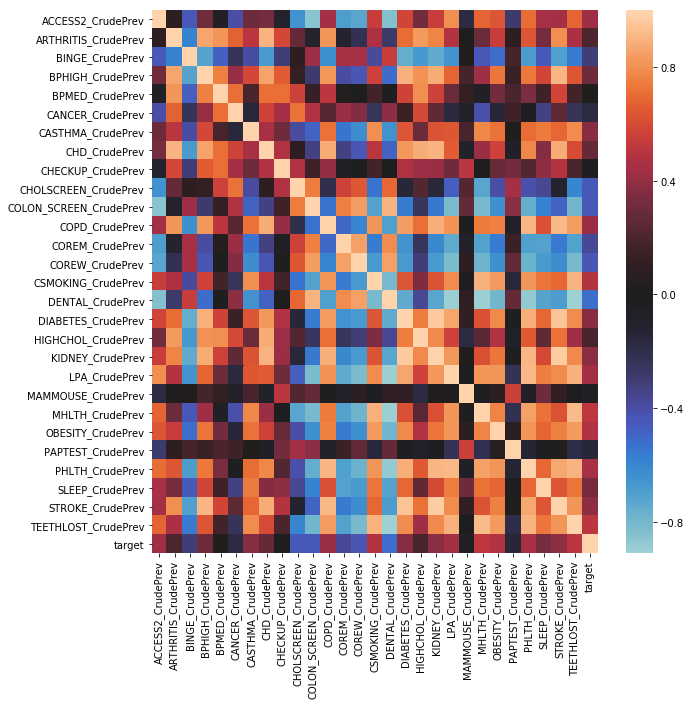

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(combined_data.iloc[:, 5:].corr(), center=0)

In [13]:
correlations = combined_data.corr().abs()

In [30]:
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))
potential_drop = [column for column in upper.columns if any(upper[column] > .90)]

In [31]:
potential_drop

['DENTAL_CrudePrev',
 'KIDNEY_CrudePrev',
 'MHLTH_CrudePrev',
 'PHLTH_CrudePrev',
 'STROKE_CrudePrev',
 'TEETHLOST_CrudePrev']

In [42]:
abs(combined_data[potential_drop].corr())

,DENTAL_CrudePrev,KIDNEY_CrudePrev,MHLTH_CrudePrev,PHLTH_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
DENTAL_CrudePrev,1.000000,0.716256,0.900197,0.877946,0.684837,0.909600
KIDNEY_CrudePrev,0.716256,1.000000,0.615162,0.905162,0.965567,0.781849
MHLTH_CrudePrev,0.900197,0.615162,1.000000,0.849397,0.626769,0.921823
PHLTH_CrudePrev,0.877946,0.905162,0.849397,1.000000,0.871482,0.902989
STROKE_CrudePrev,0.684837,0.965567,0.626769,0.871482,1.000000,0.809911
TEETHLOST_CrudePrev,0.909600,0.781849,0.921823,0.902989,0.809911,1.000000
